In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:01<00:00, 135MB/s]
100% 163M/163M [00:01<00:00, 124MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()

In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files= os.listdir('/content/data/with_mask')
print(with_mask_files)

['with_mask_2660.jpg', 'with_mask_1393.jpg', 'with_mask_2941.jpg', 'with_mask_375.jpg', 'with_mask_3505.jpg', 'with_mask_1392.jpg', 'with_mask_191.jpg', 'with_mask_3121.jpg', 'with_mask_1978.jpg', 'with_mask_1301.jpg', 'with_mask_2805.jpg', 'with_mask_804.jpg', 'with_mask_3446.jpg', 'with_mask_706.jpg', 'with_mask_1349.jpg', 'with_mask_3374.jpg', 'with_mask_918.jpg', 'with_mask_2652.jpg', 'with_mask_2845.jpg', 'with_mask_1183.jpg', 'with_mask_2323.jpg', 'with_mask_2520.jpg', 'with_mask_1133.jpg', 'with_mask_690.jpg', 'with_mask_325.jpg', 'with_mask_1472.jpg', 'with_mask_1801.jpg', 'with_mask_1360.jpg', 'with_mask_9.jpg', 'with_mask_1022.jpg', 'with_mask_816.jpg', 'with_mask_2544.jpg', 'with_mask_784.jpg', 'with_mask_500.jpg', 'with_mask_2086.jpg', 'with_mask_3718.jpg', 'with_mask_2474.jpg', 'with_mask_1329.jpg', 'with_mask_968.jpg', 'with_mask_3694.jpg', 'with_mask_1230.jpg', 'with_mask_410.jpg', 'with_mask_3560.jpg', 'with_mask_3046.jpg', 'with_mask_16.jpg', 'with_mask_1210.jpg', 'wit

In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_1926.jpg', 'without_mask_3368.jpg', 'without_mask_2002.jpg', 'without_mask_3352.jpg', 'without_mask_922.jpg']


In [ ]:
print('Number of images with mask :',len(with_mask_files))

Number of images with mask : 3725


In [ ]:
print('Number of images without mask:',len(without_mask_files))

Number of images without mask: 3828


Creating labels for two sets of images

In [ ]:
with_mask_labels=[1]*(len(with_mask_files))
without_mask_labels=[0]*(len(without_mask_files))

In [ ]:
labels= with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

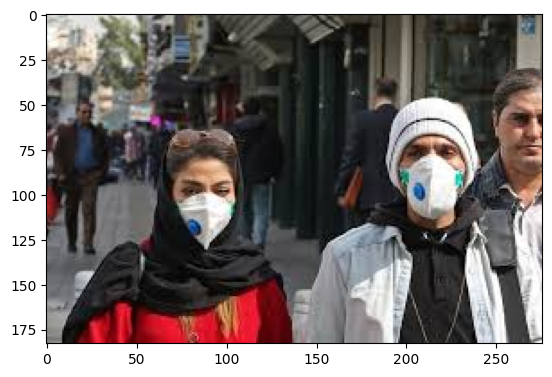

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_3698.jpg')
imgplot = plt.imshow(img)
plt.show()

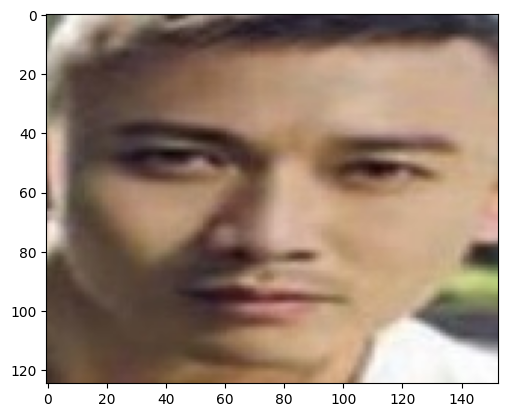

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_478.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

In [ ]:
with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path+img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#convert image list and label list to numpy arrays
X=np.array(data)
Y=np.array(labels)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape)
print(X_train.shape)

(7553, 128, 128, 3)
(6042, 128, 128, 3)


Scaling the data

In [ ]:
X_train_scaled= X_train/255
X_test_scaled = X_test/255

Building a CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
num_of_classes= 2
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))

Compile the neural network

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 23ms/step - loss: 0.4736 - acc: 0.7868 - val_loss: 0.3699 - val_acc: 0.8248
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2816 - acc: 0.8911 - val_loss: 0.2611 - val_acc: 0.8942
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2169 - acc: 0.9137 - val_loss: 0.2351 - val_acc: 0.9058
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1917 - acc: 0.9233 - val_loss: 0.2076 - val_acc: 0.9256
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1565 - acc: 0.9393 - val_loss: 0.2096 - val_acc: 0.9157


Model Evaluation

In [ ]:
loss,accuracy = model.evaluate(X_test_scaled,Y_test)
print('Test Accuracy:',accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.1840 - acc: 0.9404
Test Accuracy: 0.9404367804527283
